# Avocado Average Price Prediction and EDA.

## Objective:

This project seeks to unveil hidden insgihts in a sample avocado dataset as well as find which algorith best predicts the average avocado price using a normalized dataset.

## Table of contents:
1. Importing the libraries.
2. Loading the dataset.
3. ETL Procedures
4. Exploratory Data Analysis
5. Implementing the Average Price Prediction Models
6. Conclusion.
7. Application.

### Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import sklearn
import scipy
import matplotlib.pyplot as plt

%matplotlib inline

### Loading the dataset

In [2]:
df = pd.read_csv("D:\Personal Projects 2\Practice Files July 2024\Avocado Prices and Sales Volume 2015-2023\Avocado_HassAvocadoBoard_20152023v1.0.1.csv")

<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:1: SyntaxWarning: invalid escape sequence '\P'
C:\Users\Alvin\AppData\Local\Temp\ipykernel_98908\3243800377.py:1: SyntaxWarning: invalid escape sequence '\P'
  df = pd.read_csv("D:\Personal Projects 2\Practice Files July 2024\Avocado Prices and Sales Volume 2015-2023\Avocado_HassAvocadoBoard_20152023v1.0.1.csv")


In [3]:
df.head()

Date  AveragePrice  TotalVolume    plu4046    plu4225   plu4770  \
0  2015-01-04          1.22     40873.28    2819.50   28287.42     49.90   
1  2015-01-04          1.79      1373.95      57.42     153.88      0.00   
2  2015-01-04          1.00    435021.49  364302.39   23821.16     82.15   
3  2015-01-04          1.76      3846.69    1500.15     938.35      0.00   
4  2015-01-04          1.08    788025.06   53987.31  552906.04  39995.03   

   TotalBags  SmallBags  LargeBags  XLargeBags          type  \
0    9716.46    9186.93     529.53         0.0  conventional   
1    1162.65    1162.65       0.00         0.0       organic   
2   46815.79   16707.15   30108.64         0.0  conventional   
3    1408.19    1071.35     336.84         0.0       organic   
4  141136.68  137146.07    3990.61         0.0  conventional   

                region  
0               Albany  
1               Albany  
2              Atlanta  
3              Atlanta  
4  BaltimoreWashington

In [4]:
df.shape

(53415, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53415 entries, 0 to 53414
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          53415 non-null  object 
 1   AveragePrice  53415 non-null  float64
 2   TotalVolume   53415 non-null  float64
 3   plu4046       53415 non-null  float64
 4   plu4225       53415 non-null  float64
 5   plu4770       53415 non-null  float64
 6   TotalBags     53415 non-null  float64
 7   SmallBags     41025 non-null  float64
 8   LargeBags     41025 non-null  float64
 9   XLargeBags    41025 non-null  float64
 10  type          53415 non-null  object 
 11  region        53415 non-null  object 
dtypes: float64(9), object(3)
memory usage: 4.9+ MB


In [6]:
df.tail(2)

Date  AveragePrice  TotalVolume    plu4046    plu4225  plu4770  \
53413  2023-12-03      1.245406      2942.83    1058.54       7.46     0.00   
53414  2023-12-03      1.479240   2010020.72  271808.32  274480.64    63.43   

        TotalBags  SmallBags  LargeBags  XLargeBags     type   region  
53413     1779.19        NaN        NaN         NaN  organic  Wichita  
53414  1364514.02        NaN        NaN         NaN  organic  TotalUS

### ETL Procedures

In [7]:
## adding the month and year column

df["Month"] = pd.DatetimeIndex(df["Date"]).month
df["Year"] = pd.DatetimeIndex(df["Date"]).year

df["Month"] = df["Month"].replace({
    1 : "January",
    2 : "Febraury",
    3 : "March",
    4 : "April",
    5 : "May",
    6 : "June",
    7 : "July",
    8 : "August",
    9 : "September",
    10 : "October",
    11 : "November",
    12 : "December"
})


df.tail(3)

Date  AveragePrice  TotalVolume    plu4046    plu4225  plu4770  \
53412  2023-12-03      1.618931     34834.86   15182.42    1211.38     0.00   
53413  2023-12-03      1.245406      2942.83    1058.54       7.46     0.00   
53414  2023-12-03      1.479240   2010020.72  271808.32  274480.64    63.43   

        TotalBags  SmallBags  LargeBags  XLargeBags     type  \
53412    18075.66        NaN        NaN         NaN  organic   
53413     1779.19        NaN        NaN         NaN  organic   
53414  1364514.02        NaN        NaN         NaN  organic   

                 region     Month  Year  
53412  WestTexNewMexico  December  2023  
53413           Wichita  December  2023  
53414           TotalUS  December  2023

In [8]:
## cleaning data entries in the region

df["region"].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'Miami', 'Midsouth',
       'Nashville', 'NewOrleans', 'NewYork', 'Northeast',
       'NorthernNewEngland', 'Orlando', 'Philadelphia', 'PhoenixTucson',
       'Pittsburgh', 'Plains', 'Portland', 'RaleighGreensboro',
       'RichmondNorfolk', 'Roanoke', 'Sacramento', 'SanDiego',
       'SanFrancisco', 'Seattle', 'SouthCarolina', 'SouthCentral',
       'Southeast', 'Spokane', 'StLouis', 'Syracuse', 'Tampa', 'TotalUS',
       'West', 'WestTexNewMexico', 'BirminghamMontgomery',
       'PeoriaSpringfield', 'Providence', 'Toledo', 'Wichita',
       'MiamiFtLauderdale'], dtype=object)

In [9]:
df["region"] = df["region"].replace({
    'DallasFtWorth' : "Dallas Ft Worth",
    'GreatLakes' : "Great Lakes",
    'HarrisburgScranton' : 'Harrisburg Scranton',
    'HartfordSpringfield' : 'HartfordS pringfield',
    'LasVegas' : 'Las Vegas',
    'LosAngeles' : 'Los Angeles',
    'NewOrleans': 'New Orleans',
    'NewYork' : 'New York',
    'Northeast' : 'North East',
    'NorthernNewEngland' : 'Northern New England',
    'PhoenixTucson' : 'Phoenix Tucson',
    'RaleighGreensboro' : 'Raleigh Greensborough',
    'RichmondNorfolk' : 'Richmond Norfolk',
    'SanDiego' : 'San Diego',
    'SanFrancisco' : 'San Francisco',
    'SouthCarolina' : 'South Carolina',
    'SouthCentral' : 'South Central',
    'Southeast' : 'South East',
    'StLouis' : 'St Louis',
    'TotalUS' : 'Total US',
    'WestTexNewMexico' : 'West Texas New Mexico',
    'BirminghamMontgomery' : 'Birmingham Montgomery',
    'PeoriaSpringfield' : 'Peoria Springfield',
    'MiamiFtLauderdale' : 'Miami Ft Lauderdale'
})

In [10]:
df.head(2)

Date  AveragePrice  TotalVolume  plu4046   plu4225  plu4770  \
0  2015-01-04          1.22     40873.28  2819.50  28287.42     49.9   
1  2015-01-04          1.79      1373.95    57.42    153.88      0.0   

   TotalBags  SmallBags  LargeBags  XLargeBags          type  region    Month  \
0    9716.46    9186.93     529.53         0.0  conventional  Albany  January   
1    1162.65    1162.65       0.00         0.0       organic  Albany  January   

   Year  
0  2015  
1  2015

In [11]:
## renaming the columns 

df = df.rename(columns = {
    "AveragePrice" : "Average Price",
    "TotalVolume" : "Total Volume", 
    "TotalBags" : "Total Bags",
    "SmallBags" : "Small Bags",
    "LargeBags" : "Large Bags",
    "XLargeBags" : "Extra Large Bags",
    "type" : "Type",
    "region" : "Region",
    "plu4046" : "Small / Medium Hass Avocadoes",
    "plu4225" : "Large Hass Avocadoes",
    "plu4770" : "Extra Large Hass Avocadoes"
})

df.head(4)

Date  Average Price  Total Volume  Small / Medium Hass Avocadoes  \
0  2015-01-04           1.22      40873.28                        2819.50   
1  2015-01-04           1.79       1373.95                          57.42   
2  2015-01-04           1.00     435021.49                      364302.39   
3  2015-01-04           1.76       3846.69                        1500.15   

   Large Hass Avocadoes  Extra Large Hass Avocadoes  Total Bags  Small Bags  \
0              28287.42                       49.90     9716.46     9186.93   
1                153.88                        0.00     1162.65     1162.65   
2              23821.16                       82.15    46815.79    16707.15   
3                938.35                        0.00     1408.19     1071.35   

   Large Bags  Extra Large Bags          Type   Region    Month  Year  
0      529.53               0.0  conventional   Albany  January  2015  
1        0.00               0.0       organic   Albany  January  2015  
2    30108.64               0.0  conventional  Atlanta  January  2015  
3      336.84               0.0       organic  Atlanta  January  2015

In [12]:
## type 

df["Type"].unique()

array(['conventional', 'organic'], dtype=object)

In [13]:
df["Type"] = df["Type"].replace({
    "conventional" : "Conventional",
    "organic" : "Organic"
})

In [14]:
df.head(3)

Date  Average Price  Total Volume  Small / Medium Hass Avocadoes  \
0  2015-01-04           1.22      40873.28                        2819.50   
1  2015-01-04           1.79       1373.95                          57.42   
2  2015-01-04           1.00     435021.49                      364302.39   

   Large Hass Avocadoes  Extra Large Hass Avocadoes  Total Bags  Small Bags  \
0              28287.42                       49.90     9716.46     9186.93   
1                153.88                        0.00     1162.65     1162.65   
2              23821.16                       82.15    46815.79    16707.15   

   Large Bags  Extra Large Bags          Type   Region    Month  Year  
0      529.53               0.0  Conventional   Albany  January  2015  
1        0.00               0.0       Organic   Albany  January  2015  
2    30108.64               0.0  Conventional  Atlanta  January  2015

In [15]:
## checking for any null values

df.isnull().sum()

Date                                 0
Average Price                        0
Total Volume                         0
Small / Medium Hass Avocadoes        0
Large Hass Avocadoes                 0
Extra Large Hass Avocadoes           0
Total Bags                           0
Small Bags                       12390
Large Bags                       12390
Extra Large Bags                 12390
Type                                 0
Region                               0
Month                                0
Year                                 0
dtype: int64

In [16]:
## filling the null values 

df["Small Bags"] = df["Small Bags"].fillna(df["Small Bags"].mean())
df["Large Bags"] = df["Large Bags"].fillna(df["Large Bags"].mean())
df["Extra Large Bags"] = df["Extra Large Bags"].fillna(df["Extra Large Bags"].mean())

In [17]:
df.isnull().sum()

Date                             0
Average Price                    0
Total Volume                     0
Small / Medium Hass Avocadoes    0
Large Hass Avocadoes             0
Extra Large Hass Avocadoes       0
Total Bags                       0
Small Bags                       0
Large Bags                       0
Extra Large Bags                 0
Type                             0
Region                           0
Month                            0
Year                             0
dtype: int64

In [18]:
## checking for any duplicates

df.duplicated().sum()

0

Text(0.5, 1.0, 'Outlier Detection')

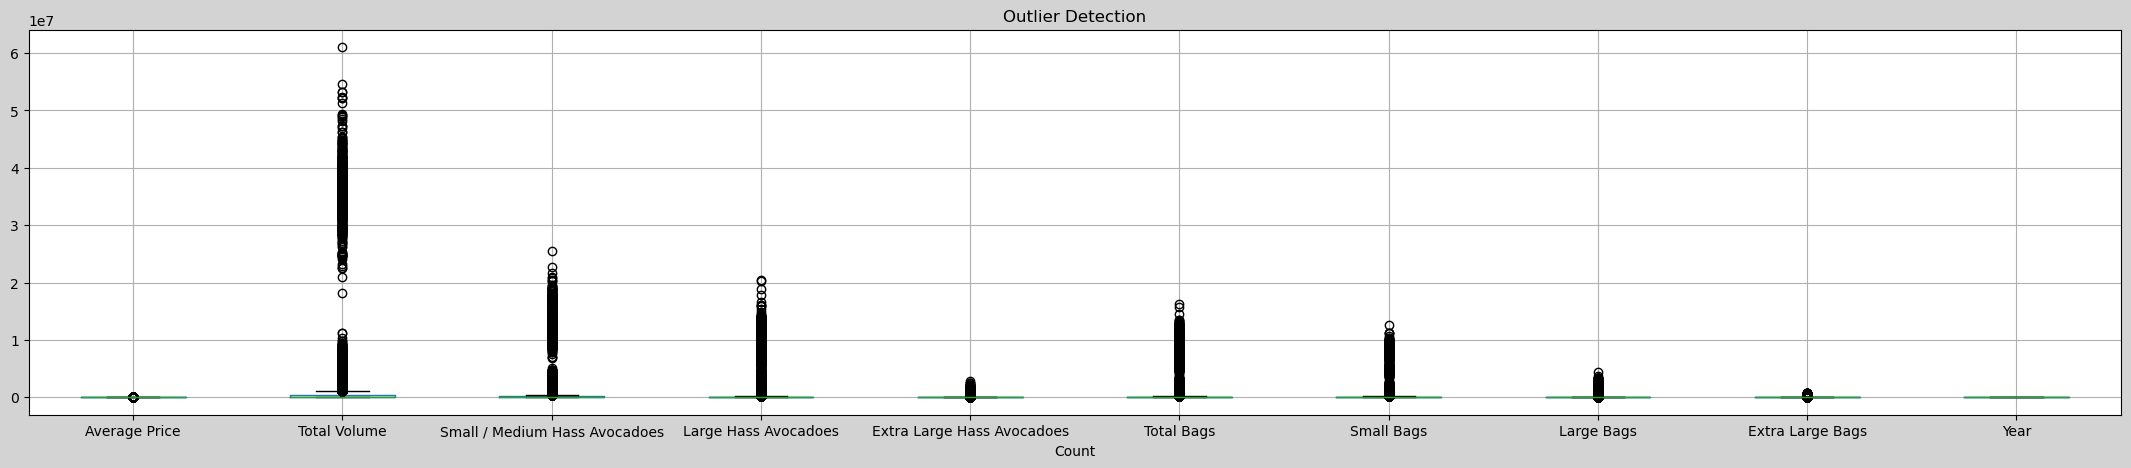

In [51]:
## checking for any outliers

plt.figure(facecolor="lightgrey", figsize=(27,5))
df.boxplot()
plt.xlabel("Count")
plt.title("Outlier Detection")

In [20]:
## Dealing with outliers - Total Volume

q1 = df["Total Volume"].quantile(0.25)
q3 = df["Total Volume"].quantile(0.75)

iqr = q3 - q1

upper_limit = q3 + (1.5 * iqr)
lower_limit = q1 - (1.5 * iqr)

df1 = df.loc[(df["Total Volume"] < upper_limit) & (df["Total Volume"] > lower_limit)]
df1

Date  Average Price  Total Volume  Small / Medium Hass Avocadoes  \
0      2015-01-04       1.220000      40873.28                        2819.50   
1      2015-01-04       1.790000       1373.95                          57.42   
2      2015-01-04       1.000000     435021.49                      364302.39   
3      2015-01-04       1.760000       3846.69                        1500.15   
4      2015-01-04       1.080000     788025.06                       53987.31   
...           ...            ...           ...                            ...   
53409  2023-12-03       1.421139      24520.55                         222.70   
53410  2023-12-03       1.550513       5693.91                         204.64   
53411  2023-12-03       1.703920     343326.10                       66808.44   
53412  2023-12-03       1.618931      34834.86                       15182.42   
53413  2023-12-03       1.245406       2942.83                        1058.54   

       Large Hass Avocadoes  Extra Large Hass Avocadoes  Total Bags  \
0                  28287.42                       49.90     9716.46   
1                    153.88                        0.00     1162.65   
2                  23821.16                       82.15    46815.79   
3                    938.35                        0.00     1408.19   
4                 552906.04                    39995.03   141136.68   
...                     ...                         ...         ...   
53409                 91.35                        0.00    24206.50   
53410               1211.25                        0.00     4278.03   
53411             132075.11                       58.65   138830.45   
53412               1211.38                        0.00    18075.66   
53413                  7.46                        0.00     1779.19   

          Small Bags    Large Bags  Extra Large Bags          Type  \
0        9186.930000    529.530000          0.000000  Conventional   
1        1162.650000      0.000000          0.000000       Organic   
2       16707.150000  30108.640000          0.000000  Conventional   
3        1071.350000    336.840000          0.000000       Organic   
4      137146.070000   3990.610000          0.000000  Conventional   
...              ...           ...               ...           ...   
53409  103922.170677  23313.164066       2731.811796       Organic   
53410  103922.170677  23313.164066       2731.811796       Organic   
53411  103922.170677  23313.164066       2731.811796       Organic   
53412  103922.170677  23313.164066       2731.811796       Organic   
53413  103922.170677  23313.164066       2731.811796       Organic   

                      Region     Month  Year  
0                     Albany   January  2015  
1                     Albany   January  2015  
2                    Atlanta   January  2015  
3                    Atlanta   January  2015  
4        BaltimoreWashington   January  2015  
...                      ...       ...   ...  
53409                  Tampa  December  2023  
53410                 Toledo  December  2023  
53411                   West  December  2023  
53412  West Texas New Mexico  December  2023  
53413                Wichita  December  2023  

[46931 rows x 14 columns]

In [21]:
print("Outliers Removed:", len(df) - len(df1))

Outliers Removed: 6484


In [28]:
## Dealing with outliers - Small / Medium Hass Avocadoes

q1 = df1["Small / Medium Hass Avocadoes"].quantile(0.25)
q3 = df1["Small / Medium Hass Avocadoes"].quantile(0.75)

iqr = q3 - q1

upper_limit = q3 + (1.5 * iqr)
lower_limit = q1 - (1.5 * iqr)

df2 = df1.loc[(df1["Small / Medium Hass Avocadoes"] < upper_limit) & (df1["Small / Medium Hass Avocadoes"] > lower_limit)]
df2

Date  Average Price  Total Volume  Small / Medium Hass Avocadoes  \
0      2015-01-04       1.220000      40873.28                        2819.50   
1      2015-01-04       1.790000       1373.95                          57.42   
3      2015-01-04       1.760000       3846.69                        1500.15   
4      2015-01-04       1.080000     788025.06                       53987.31   
5      2015-01-04       1.290000      19137.28                        8040.64   
...           ...            ...           ...                            ...   
53409  2023-12-03       1.421139      24520.55                         222.70   
53410  2023-12-03       1.550513       5693.91                         204.64   
53411  2023-12-03       1.703920     343326.10                       66808.44   
53412  2023-12-03       1.618931      34834.86                       15182.42   
53413  2023-12-03       1.245406       2942.83                        1058.54   

       Large Hass Avocadoes  Extra Large Hass Avocadoes  Total Bags  \
0                  28287.42                       49.90     9716.46   
1                    153.88                        0.00     1162.65   
3                    938.35                        0.00     1408.19   
4                 552906.04                    39995.03   141136.68   
5                   6557.47                      657.48     3881.69   
...                     ...                         ...         ...   
53409                 91.35                        0.00    24206.50   
53410               1211.25                        0.00     4278.03   
53411             132075.11                       58.65   138830.45   
53412               1211.38                        0.00    18075.66   
53413                  7.46                        0.00     1779.19   

          Small Bags    Large Bags  Extra Large Bags          Type  \
0        9186.930000    529.530000          0.000000  Conventional   
1        1162.650000      0.000000          0.000000       Organic   
3        1071.350000    336.840000          0.000000       Organic   
4      137146.070000   3990.610000          0.000000  Conventional   
5        3881.690000      0.000000          0.000000       Organic   
...              ...           ...               ...           ...   
53409  103922.170677  23313.164066       2731.811796       Organic   
53410  103922.170677  23313.164066       2731.811796       Organic   
53411  103922.170677  23313.164066       2731.811796       Organic   
53412  103922.170677  23313.164066       2731.811796       Organic   
53413  103922.170677  23313.164066       2731.811796       Organic   

                      Region     Month  Year  
0                     Albany   January  2015  
1                     Albany   January  2015  
3                    Atlanta   January  2015  
4        BaltimoreWashington   January  2015  
5        BaltimoreWashington   January  2015  
...                      ...       ...   ...  
53409                  Tampa  December  2023  
53410                 Toledo  December  2023  
53411                   West  December  2023  
53412  West Texas New Mexico  December  2023  
53413                Wichita  December  2023  

[42366 rows x 14 columns]

In [27]:
print("Outliers Removed:", len(df1) - len(df2))

Outliers Removed: 4565


In [29]:
## Dealing with outliers - Large Hass Avocadoes

q1 = df2["Large Hass Avocadoes"].quantile(0.25)
q3 = df2["Large Hass Avocadoes"].quantile(0.75)

iqr = q3 - q1

upper_limit = q3 + (1.5 * iqr)
lower_limit = q1 - (1.5 * iqr)

df3 = df2.loc[(df1["Large Hass Avocadoes"] < upper_limit) & (df2["Large Hass Avocadoes"] > lower_limit)]
df3

Date  Average Price  Total Volume  Small / Medium Hass Avocadoes  \
0      2015-01-04       1.220000      40873.28                        2819.50   
1      2015-01-04       1.790000       1373.95                          57.42   
3      2015-01-04       1.760000       3846.69                        1500.15   
5      2015-01-04       1.290000      19137.28                        8040.64   
6      2015-01-04       1.010000      80034.32                       44562.12   
...           ...            ...           ...                            ...   
53408  2023-12-03       1.616528       4947.25                         154.75   
53409  2023-12-03       1.421139      24520.55                         222.70   
53410  2023-12-03       1.550513       5693.91                         204.64   
53412  2023-12-03       1.618931      34834.86                       15182.42   
53413  2023-12-03       1.245406       2942.83                        1058.54   

       Large Hass Avocadoes  Extra Large Hass Avocadoes  Total Bags  \
0                  28287.42                       49.90     9716.46   
1                    153.88                        0.00     1162.65   
3                    938.35                        0.00     1408.19   
5                   6557.47                      657.48     3881.69   
6                  24964.23                     2752.35     7755.62   
...                     ...                         ...         ...   
53408                194.69                        0.00     4475.54   
53409                 91.35                        0.00    24206.50   
53410               1211.25                        0.00     4278.03   
53412               1211.38                        0.00    18075.66   
53413                  7.46                        0.00     1779.19   

          Small Bags    Large Bags  Extra Large Bags          Type  \
0        9186.930000    529.530000          0.000000  Conventional   
1        1162.650000      0.000000          0.000000       Organic   
3        1071.350000    336.840000          0.000000       Organic   
5        3881.690000      0.000000          0.000000       Organic   
6        6064.300000   1691.320000          0.000000  Conventional   
...              ...           ...               ...           ...   
53408  103922.170677  23313.164066       2731.811796       Organic   
53409  103922.170677  23313.164066       2731.811796       Organic   
53410  103922.170677  23313.164066       2731.811796       Organic   
53412  103922.170677  23313.164066       2731.811796       Organic   
53413  103922.170677  23313.164066       2731.811796       Organic   

                      Region     Month  Year  
0                     Albany   January  2015  
1                     Albany   January  2015  
3                    Atlanta   January  2015  
5        BaltimoreWashington   January  2015  
6                      Boise   January  2015  
...                      ...       ...   ...  
53408               Syracuse  December  2023  
53409                  Tampa  December  2023  
53410                 Toledo  December  2023  
53412  West Texas New Mexico  December  2023  
53413                Wichita  December  2023  

[37533 rows x 14 columns]

In [30]:
print("Outliers Removed:", len(df2) - len(df3))

Outliers Removed: 4833


In [31]:
## Dealing with outliers - Extra Large Hass Avocadoes

q1 = df3["Extra Large Hass Avocadoes"].quantile(0.25)
q3 = df3["Extra Large Hass Avocadoes"].quantile(0.75)

iqr = q3 - q1

upper_limit = q3 + (1.5 * iqr)
lower_limit = q1 - (1.5 * iqr)

df4 = df2.loc[(df1["Extra Large Hass Avocadoes"] < upper_limit) & (df2["Extra Large Hass Avocadoes"] > lower_limit)]
df4

Date  Average Price  Total Volume  Small / Medium Hass Avocadoes  \
0      2015-01-04       1.220000      40873.28                        2819.50   
1      2015-01-04       1.790000       1373.95                          57.42   
3      2015-01-04       1.760000       3846.69                        1500.15   
7      2015-01-04       1.640000       1505.12                           1.27   
8      2015-01-04       1.020000     491738.00                        7193.87   
...           ...            ...           ...                            ...   
53409  2023-12-03       1.421139      24520.55                         222.70   
53410  2023-12-03       1.550513       5693.91                         204.64   
53411  2023-12-03       1.703920     343326.10                       66808.44   
53412  2023-12-03       1.618931      34834.86                       15182.42   
53413  2023-12-03       1.245406       2942.83                        1058.54   

       Large Hass Avocadoes  Extra Large Hass Avocadoes  Total Bags  \
0                  28287.42                       49.90     9716.46   
1                    153.88                        0.00     1162.65   
3                    938.35                        0.00     1408.19   
7                   1129.50                        0.00      374.35   
8                 396752.18                      128.82    87663.13   
...                     ...                         ...         ...   
53409                 91.35                        0.00    24206.50   
53410               1211.25                        0.00     4278.03   
53411             132075.11                       58.65   138830.45   
53412               1211.38                        0.00    18075.66   
53413                  7.46                        0.00     1779.19   

          Small Bags    Large Bags  Extra Large Bags          Type  \
0        9186.930000    529.530000          0.000000  Conventional   
1        1162.650000      0.000000          0.000000       Organic   
3        1071.350000    336.840000          0.000000       Organic   
7         186.670000    187.680000          0.000000       Organic   
8       87406.840000    256.290000          0.000000  Conventional   
...              ...           ...               ...           ...   
53409  103922.170677  23313.164066       2731.811796       Organic   
53410  103922.170677  23313.164066       2731.811796       Organic   
53411  103922.170677  23313.164066       2731.811796       Organic   
53412  103922.170677  23313.164066       2731.811796       Organic   
53413  103922.170677  23313.164066       2731.811796       Organic   

                      Region     Month  Year  
0                     Albany   January  2015  
1                     Albany   January  2015  
3                    Atlanta   January  2015  
7                      Boise   January  2015  
8                     Boston   January  2015  
...                      ...       ...   ...  
53409                  Tampa  December  2023  
53410                 Toledo  December  2023  
53411                   West  December  2023  
53412  West Texas New Mexico  December  2023  
53413                Wichita  December  2023  

[31601 rows x 14 columns]

In [32]:
print("Outliers Removed:", len(df3) - len(df4))

Outliers Removed: 5932


In [36]:
## Dealing with outliers - Total Bags

q1 = df4["Total Bags"].quantile(0.25)
q3 = df4["Total Bags"].quantile(0.75)

iqr = q3 - q1

upper_limit = q3 + (1.5 * iqr)
lower_limit = q1 - (1.5 * iqr)

df5 = df4.loc[(df4["Total Bags"] < upper_limit) & (df4["Total Bags"] > lower_limit)]
df5

Date  Average Price  Total Volume  Small / Medium Hass Avocadoes  \
0      2015-01-04       1.220000      40873.28                        2819.50   
1      2015-01-04       1.790000       1373.95                          57.42   
3      2015-01-04       1.760000       3846.69                        1500.15   
7      2015-01-04       1.640000       1505.12                           1.27   
9      2015-01-04       1.830000       2192.13                           8.66   
...           ...            ...           ...                            ...   
53408  2023-12-03       1.616528       4947.25                         154.75   
53409  2023-12-03       1.421139      24520.55                         222.70   
53410  2023-12-03       1.550513       5693.91                         204.64   
53412  2023-12-03       1.618931      34834.86                       15182.42   
53413  2023-12-03       1.245406       2942.83                        1058.54   

       Large Hass Avocadoes  Extra Large Hass Avocadoes  Total Bags  \
0                  28287.42                        49.9     9716.46   
1                    153.88                         0.0     1162.65   
3                    938.35                         0.0     1408.19   
7                   1129.50                         0.0      374.35   
9                    939.43                         0.0     1244.04   
...                     ...                         ...         ...   
53408                194.69                         0.0     4475.54   
53409                 91.35                         0.0    24206.50   
53410               1211.25                         0.0     4278.03   
53412               1211.38                         0.0    18075.66   
53413                  7.46                         0.0     1779.19   

          Small Bags    Large Bags  Extra Large Bags          Type  \
0        9186.930000    529.530000          0.000000  Conventional   
1        1162.650000      0.000000          0.000000       Organic   
3        1071.350000    336.840000          0.000000       Organic   
7         186.670000    187.680000          0.000000       Organic   
9        1244.040000      0.000000          0.000000       Organic   
...              ...           ...               ...           ...   
53408  103922.170677  23313.164066       2731.811796       Organic   
53409  103922.170677  23313.164066       2731.811796       Organic   
53410  103922.170677  23313.164066       2731.811796       Organic   
53412  103922.170677  23313.164066       2731.811796       Organic   
53413  103922.170677  23313.164066       2731.811796       Organic   

                      Region     Month  Year  
0                     Albany   January  2015  
1                     Albany   January  2015  
3                    Atlanta   January  2015  
7                      Boise   January  2015  
9                     Boston   January  2015  
...                      ...       ...   ...  
53408               Syracuse  December  2023  
53409                  Tampa  December  2023  
53410                 Toledo  December  2023  
53412  West Texas New Mexico  December  2023  
53413                Wichita  December  2023  

[28619 rows x 14 columns]

In [37]:
print("Outliers Removed:", len(df4) - len(df5))

Outliers Removed: 2982


In [39]:
## Dealing with outliers - Small Bags

q1 = df5["Small Bags"].quantile(0.25)
q3 = df5["Small Bags"].quantile(0.75)

iqr = q3 - q1

upper_limit = q3 + (1.5 * iqr)
lower_limit = q1 - (1.5 * iqr)

df6 = df5.loc[(df5["Small Bags"] < upper_limit) & (df5["Small Bags"] > lower_limit)]
df6

Date  Average Price  Total Volume  Small / Medium Hass Avocadoes  \
0      2015-01-04       1.220000      40873.28                        2819.50   
1      2015-01-04       1.790000       1373.95                          57.42   
3      2015-01-04       1.760000       3846.69                        1500.15   
7      2015-01-04       1.640000       1505.12                           1.27   
9      2015-01-04       1.830000       2192.13                           8.66   
...           ...            ...           ...                            ...   
53408  2023-12-03       1.616528       4947.25                         154.75   
53409  2023-12-03       1.421139      24520.55                         222.70   
53410  2023-12-03       1.550513       5693.91                         204.64   
53412  2023-12-03       1.618931      34834.86                       15182.42   
53413  2023-12-03       1.245406       2942.83                        1058.54   

       Large Hass Avocadoes  Extra Large Hass Avocadoes  Total Bags  \
0                  28287.42                        49.9     9716.46   
1                    153.88                         0.0     1162.65   
3                    938.35                         0.0     1408.19   
7                   1129.50                         0.0      374.35   
9                    939.43                         0.0     1244.04   
...                     ...                         ...         ...   
53408                194.69                         0.0     4475.54   
53409                 91.35                         0.0    24206.50   
53410               1211.25                         0.0     4278.03   
53412               1211.38                         0.0    18075.66   
53413                  7.46                         0.0     1779.19   

          Small Bags    Large Bags  Extra Large Bags          Type  \
0        9186.930000    529.530000          0.000000  Conventional   
1        1162.650000      0.000000          0.000000       Organic   
3        1071.350000    336.840000          0.000000       Organic   
7         186.670000    187.680000          0.000000       Organic   
9        1244.040000      0.000000          0.000000       Organic   
...              ...           ...               ...           ...   
53408  103922.170677  23313.164066       2731.811796       Organic   
53409  103922.170677  23313.164066       2731.811796       Organic   
53410  103922.170677  23313.164066       2731.811796       Organic   
53412  103922.170677  23313.164066       2731.811796       Organic   
53413  103922.170677  23313.164066       2731.811796       Organic   

                      Region     Month  Year  
0                     Albany   January  2015  
1                     Albany   January  2015  
3                    Atlanta   January  2015  
7                      Boise   January  2015  
9                     Boston   January  2015  
...                      ...       ...   ...  
53408               Syracuse  December  2023  
53409                  Tampa  December  2023  
53410                 Toledo  December  2023  
53412  West Texas New Mexico  December  2023  
53413                Wichita  December  2023  

[28619 rows x 14 columns]

In [40]:
print("Outliers Removed:", len(df5) - len(df6))

Outliers Removed: 0


In [41]:
## Dealing with outliers - Large Bags

q1 = df6["Large Bags"].quantile(0.25)
q3 = df6["Large Bags"].quantile(0.75)

iqr = q3 - q1

upper_limit = q3 + (1.5 * iqr)
lower_limit = q1 - (1.5 * iqr)

df7 = df6.loc[(df6["Large Bags"] < upper_limit) & (df6["Large Bags"] > lower_limit)]
df7

Date  Average Price  Total Volume  Small / Medium Hass Avocadoes  \
0      2015-01-04       1.220000      40873.28                        2819.50   
1      2015-01-04       1.790000       1373.95                          57.42   
3      2015-01-04       1.760000       3846.69                        1500.15   
7      2015-01-04       1.640000       1505.12                           1.27   
9      2015-01-04       1.830000       2192.13                           8.66   
...           ...            ...           ...                            ...   
53408  2023-12-03       1.616528       4947.25                         154.75   
53409  2023-12-03       1.421139      24520.55                         222.70   
53410  2023-12-03       1.550513       5693.91                         204.64   
53412  2023-12-03       1.618931      34834.86                       15182.42   
53413  2023-12-03       1.245406       2942.83                        1058.54   

       Large Hass Avocadoes  Extra Large Hass Avocadoes  Total Bags  \
0                  28287.42                        49.9     9716.46   
1                    153.88                         0.0     1162.65   
3                    938.35                         0.0     1408.19   
7                   1129.50                         0.0      374.35   
9                    939.43                         0.0     1244.04   
...                     ...                         ...         ...   
53408                194.69                         0.0     4475.54   
53409                 91.35                         0.0    24206.50   
53410               1211.25                         0.0     4278.03   
53412               1211.38                         0.0    18075.66   
53413                  7.46                         0.0     1779.19   

          Small Bags    Large Bags  Extra Large Bags          Type  \
0        9186.930000    529.530000          0.000000  Conventional   
1        1162.650000      0.000000          0.000000       Organic   
3        1071.350000    336.840000          0.000000       Organic   
7         186.670000    187.680000          0.000000       Organic   
9        1244.040000      0.000000          0.000000       Organic   
...              ...           ...               ...           ...   
53408  103922.170677  23313.164066       2731.811796       Organic   
53409  103922.170677  23313.164066       2731.811796       Organic   
53410  103922.170677  23313.164066       2731.811796       Organic   
53412  103922.170677  23313.164066       2731.811796       Organic   
53413  103922.170677  23313.164066       2731.811796       Organic   

                      Region     Month  Year  
0                     Albany   January  2015  
1                     Albany   January  2015  
3                    Atlanta   January  2015  
7                      Boise   January  2015  
9                     Boston   January  2015  
...                      ...       ...   ...  
53408               Syracuse  December  2023  
53409                  Tampa  December  2023  
53410                 Toledo  December  2023  
53412  West Texas New Mexico  December  2023  
53413                Wichita  December  2023  

[28555 rows x 14 columns]

In [42]:
print("Outliers Removed:", len(df6) - len(df7))

Outliers Removed: 64


In [43]:
## Dealing with outliers - Extra Large Bags

q1 = df7["Extra Large Bags"].quantile(0.25)
q3 = df7["Extra Large Bags"].quantile(0.75)

iqr = q3 - q1

upper_limit = q3 + (1.5 * iqr)
lower_limit = q1 - (1.5 * iqr)

df8 = df7.loc[(df7["Extra Large Bags"] < upper_limit) & (df7["Extra Large Bags"] > lower_limit)]
df8

Date  Average Price  Total Volume  Small / Medium Hass Avocadoes  \
0      2015-01-04       1.220000      40873.28                        2819.50   
1      2015-01-04       1.790000       1373.95                          57.42   
3      2015-01-04       1.760000       3846.69                        1500.15   
7      2015-01-04       1.640000       1505.12                           1.27   
9      2015-01-04       1.830000       2192.13                           8.66   
...           ...            ...           ...                            ...   
53408  2023-12-03       1.616528       4947.25                         154.75   
53409  2023-12-03       1.421139      24520.55                         222.70   
53410  2023-12-03       1.550513       5693.91                         204.64   
53412  2023-12-03       1.618931      34834.86                       15182.42   
53413  2023-12-03       1.245406       2942.83                        1058.54   

       Large Hass Avocadoes  Extra Large Hass Avocadoes  Total Bags  \
0                  28287.42                        49.9     9716.46   
1                    153.88                         0.0     1162.65   
3                    938.35                         0.0     1408.19   
7                   1129.50                         0.0      374.35   
9                    939.43                         0.0     1244.04   
...                     ...                         ...         ...   
53408                194.69                         0.0     4475.54   
53409                 91.35                         0.0    24206.50   
53410               1211.25                         0.0     4278.03   
53412               1211.38                         0.0    18075.66   
53413                  7.46                         0.0     1779.19   

          Small Bags    Large Bags  Extra Large Bags          Type  \
0        9186.930000    529.530000          0.000000  Conventional   
1        1162.650000      0.000000          0.000000       Organic   
3        1071.350000    336.840000          0.000000       Organic   
7         186.670000    187.680000          0.000000       Organic   
9        1244.040000      0.000000          0.000000       Organic   
...              ...           ...               ...           ...   
53408  103922.170677  23313.164066       2731.811796       Organic   
53409  103922.170677  23313.164066       2731.811796       Organic   
53410  103922.170677  23313.164066       2731.811796       Organic   
53412  103922.170677  23313.164066       2731.811796       Organic   
53413  103922.170677  23313.164066       2731.811796       Organic   

                      Region     Month  Year  
0                     Albany   January  2015  
1                     Albany   January  2015  
3                    Atlanta   January  2015  
7                      Boise   January  2015  
9                     Boston   January  2015  
...                      ...       ...   ...  
53408               Syracuse  December  2023  
53409                  Tampa  December  2023  
53410                 Toledo  December  2023  
53412  West Texas New Mexico  December  2023  
53413                Wichita  December  2023  

[28305 rows x 14 columns]

In [44]:
print("Outliers Removed:", len(df7) - len(df8))

Outliers Removed: 250


In [46]:
## Dealing with outliers - Average Price

q1 = df8["Average Price"].quantile(0.25)
q3 = df8["Average Price"].quantile(0.75)

iqr = q3 - q1

upper_limit = q3 + (1.5 * iqr)
lower_limit = q1 - (1.5 * iqr)

df9 = df8.loc[(df8["Average Price"] < upper_limit) & (df8["Average Price"] > lower_limit)]
df9

Date  Average Price  Total Volume  Small / Medium Hass Avocadoes  \
0      2015-01-04       1.220000      40873.28                        2819.50   
1      2015-01-04       1.790000       1373.95                          57.42   
3      2015-01-04       1.760000       3846.69                        1500.15   
7      2015-01-04       1.640000       1505.12                           1.27   
9      2015-01-04       1.830000       2192.13                           8.66   
...           ...            ...           ...                            ...   
53408  2023-12-03       1.616528       4947.25                         154.75   
53409  2023-12-03       1.421139      24520.55                         222.70   
53410  2023-12-03       1.550513       5693.91                         204.64   
53412  2023-12-03       1.618931      34834.86                       15182.42   
53413  2023-12-03       1.245406       2942.83                        1058.54   

       Large Hass Avocadoes  Extra Large Hass Avocadoes  Total Bags  \
0                  28287.42                        49.9     9716.46   
1                    153.88                         0.0     1162.65   
3                    938.35                         0.0     1408.19   
7                   1129.50                         0.0      374.35   
9                    939.43                         0.0     1244.04   
...                     ...                         ...         ...   
53408                194.69                         0.0     4475.54   
53409                 91.35                         0.0    24206.50   
53410               1211.25                         0.0     4278.03   
53412               1211.38                         0.0    18075.66   
53413                  7.46                         0.0     1779.19   

          Small Bags    Large Bags  Extra Large Bags          Type  \
0        9186.930000    529.530000          0.000000  Conventional   
1        1162.650000      0.000000          0.000000       Organic   
3        1071.350000    336.840000          0.000000       Organic   
7         186.670000    187.680000          0.000000       Organic   
9        1244.040000      0.000000          0.000000       Organic   
...              ...           ...               ...           ...   
53408  103922.170677  23313.164066       2731.811796       Organic   
53409  103922.170677  23313.164066       2731.811796       Organic   
53410  103922.170677  23313.164066       2731.811796       Organic   
53412  103922.170677  23313.164066       2731.811796       Organic   
53413  103922.170677  23313.164066       2731.811796       Organic   

                      Region     Month  Year  
0                     Albany   January  2015  
1                     Albany   January  2015  
3                    Atlanta   January  2015  
7                      Boise   January  2015  
9                     Boston   January  2015  
...                      ...       ...   ...  
53408               Syracuse  December  2023  
53409                  Tampa  December  2023  
53410                 Toledo  December  2023  
53412  West Texas New Mexico  December  2023  
53413                Wichita  December  2023  

[27966 rows x 14 columns]

In [47]:
print("Outliers Removed:", len(df8) - len(df9))

Outliers Removed: 339


In [49]:
data = df9

### Explooratory Data Analysis 

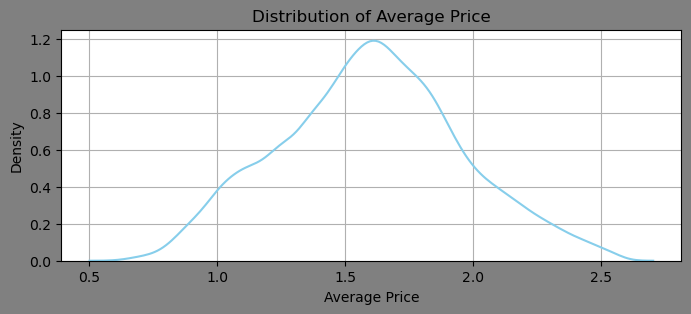

In [79]:
## distribution of Volume and average price

plt.figure(facecolor="grey", figsize = (8,3))
sb.kdeplot(data, x = "Average Price", color="skyblue")
plt.title("Distribution of Average Price")
plt.grid(True)

###### The Average Price has a normal distribution.

Text(0.5, 1.0, 'Correlation Between Variables')

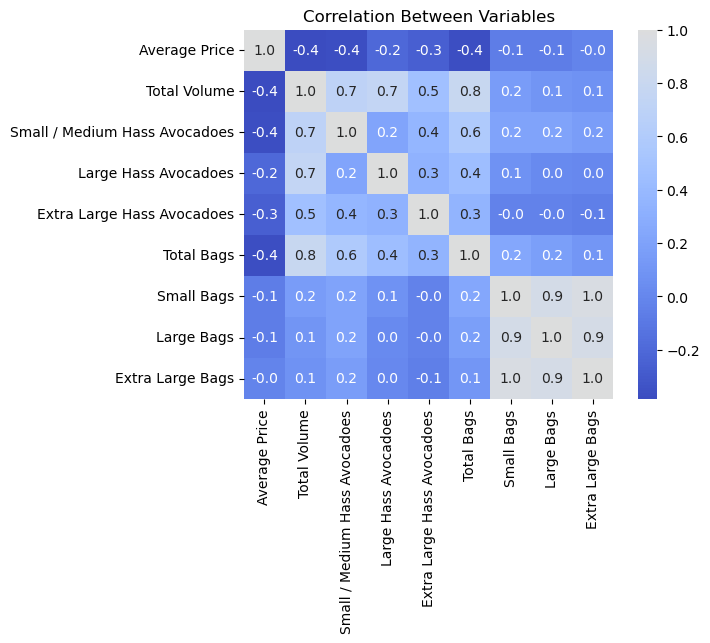

In [77]:
## correlation between variables

numeric = data.drop(["Date", "Type", "Region", "Month", "Year"], axis = 1)

correlation = numeric.corr()

sb.heatmap(correlation, annot=True, cmap="coolwarm", square=True, center=True, cbar=True, annot_kws={"size" : 10}, fmt = ".1f")
plt.title("Correlation Between Variables")

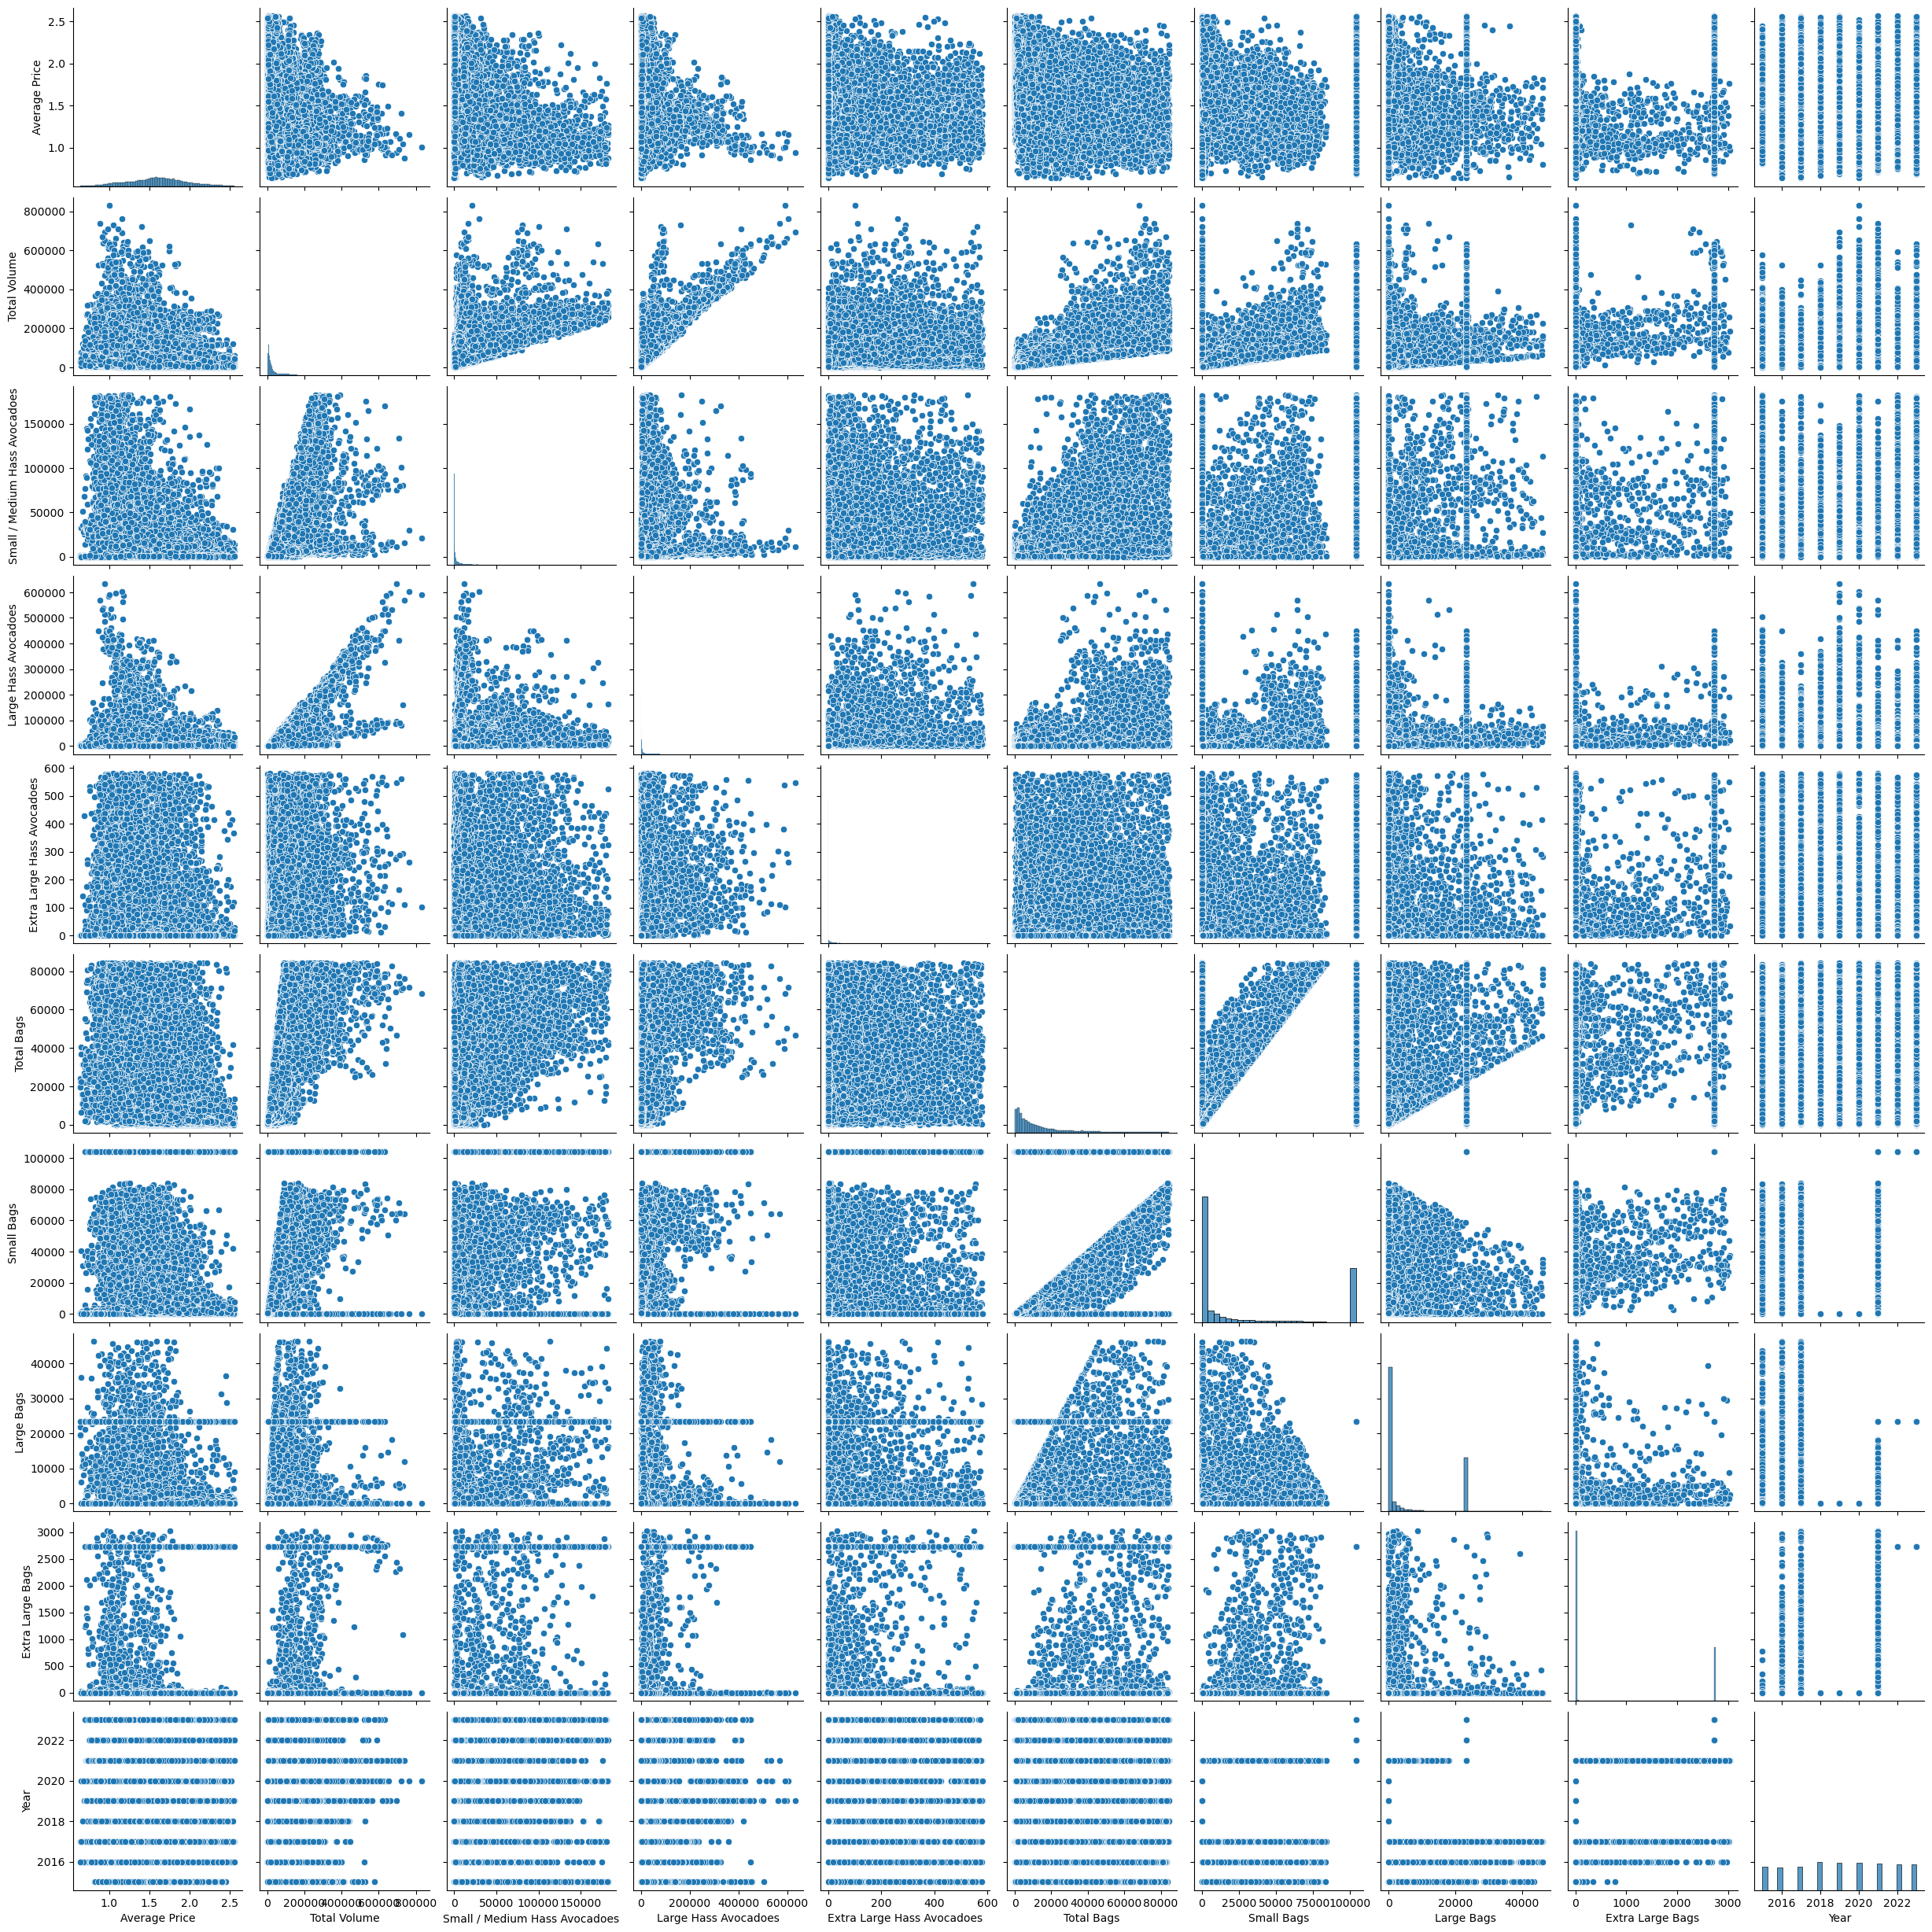

In [78]:
## multivariate analysis 

sb.pairplot(data)

Text(0.5, 1.0, 'Distribution Between Total Volume Per Region & Type')

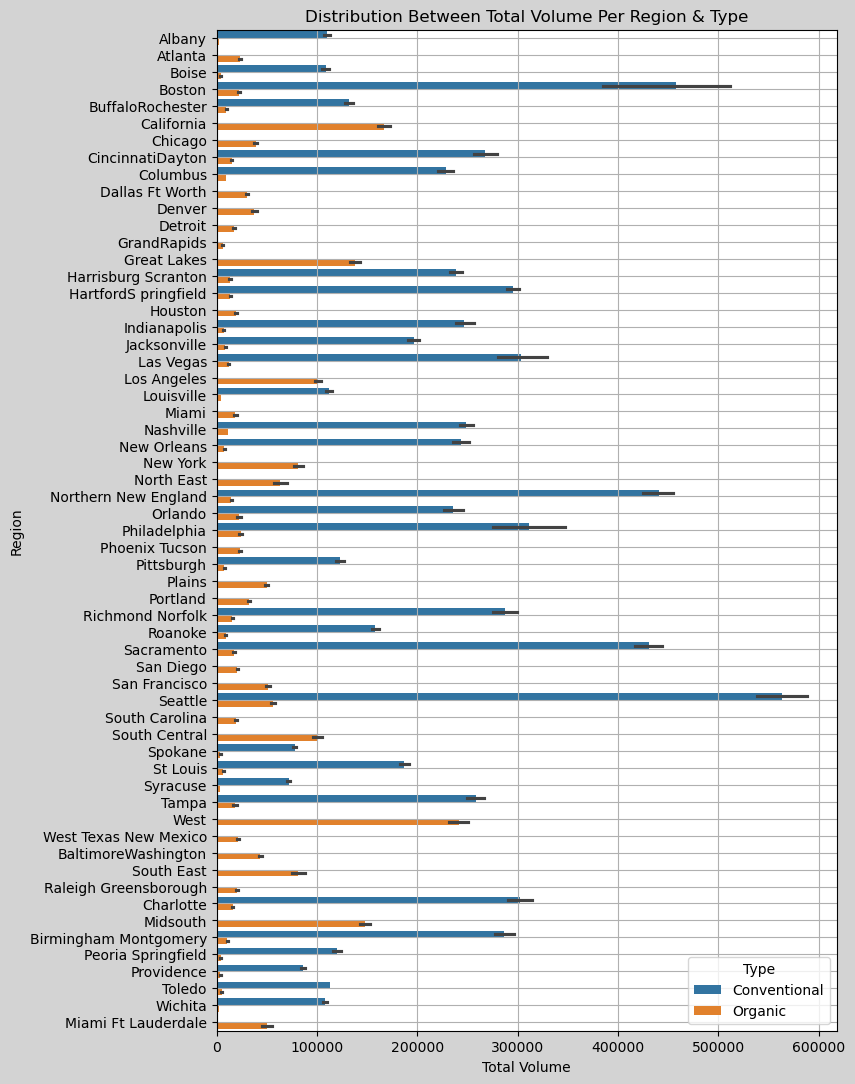

In [88]:
## total volume per region and type

plt.figure(facecolor="lightgrey", figsize = (8,13))
sb.barplot(data, y="Region", x="Total Volume", hue="Type")
plt.grid(True)
plt.title("Distribution Between Total Volume Per Region & Type")

##### Seattle has the highest convenction supply of avocadoes while the West has the highest organic supply of avocadoes.

### Implementing Price Prediction Models

In [89]:
## defining the d.v and i.v

X = numeric.drop(["Average Price"], axis = 1)
y = numeric["Average Price"]

In [90]:
## dividing into training and testings sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, random_state=100)

In [92]:
## scaling the data 

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

#### 1. Linear Regression

In [93]:
## loading the regressor 

from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [94]:
## Fitting the data onto the regressor

lr.fit(X_train, y_train)

LinearRegression()

In [95]:
## finding out the intercept

lr.intercept_

1.5997598305793401

In [97]:
## predicting the model

lr_pred = lr.predict(X_test)
lr_pred

array([1.33985987, 1.65235281, 1.58847107, ..., 1.45830717, 1.6996689 ,
       1.65571597])

Text(0.5, 1.0, 'Predicted vs Actual Values')

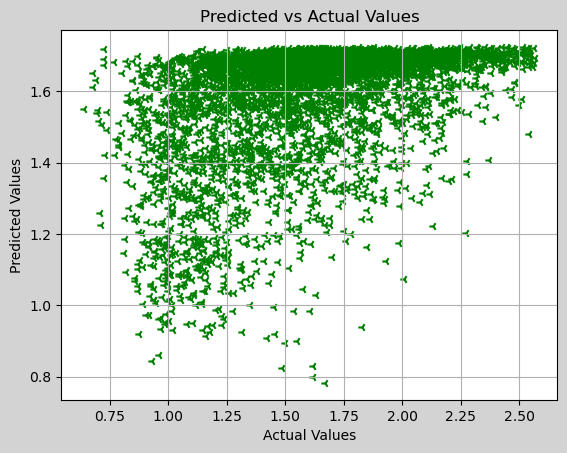

In [103]:
## plotting the results

plt.figure(facecolor="lightgrey")
plt.scatter(y_test, lr_pred , marker="3", color = "green")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.grid(True)
plt.title("Predicted vs Actual Values")

In [105]:
## Linear Regression Metrics

from sklearn.metrics import r2_score, mean_squared_error, mean_poisson_deviance, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

print("Mean Absolute Error:", mean_absolute_error(lr_pred, y_test))
print("Mean Absolute Percentage Error:", mean_absolute_percentage_error(lr_pred, y_test))
print("Mean Poisson Deviance:", mean_poisson_deviance(lr_pred, y_test))
print("Mean Squared Error:", mean_squared_error(lr_pred, y_test))
print("R^2 Score:", r2_score(lr_pred, y_test))
print("Adjusted R^2 Score:", 1 - (1 - r2_score(lr_pred, y_test) * len( y_train - 1) / len(y_train) - X_train.shape[1] - 1))

Mean Absolute Error: 0.25948678705918
Mean Absolute Percentage Error: 0.16389314613926348
Mean Poisson Deviance: 0.06901961689037833
Mean Squared Error: 0.10685438406937037
R^2 Score: -3.352383004714472
Adjusted R^2 Score: 5.647616995285528


#### 2. Random Forests Regressor

In [110]:
## loading the regressor

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

In [111]:
## fitting the data 

rf.fit(X_train, y_train)

RandomForestRegressor()

In [112]:
## finding out the intercept

rf_pred = rf.predict(X_test)
rf_pred

array([1.4135385 , 1.16146968, 1.80577187, ..., 1.54676946, 1.88504761,
       1.34753022])

Text(0.5, 1.0, 'Predicted vs Actual Values')

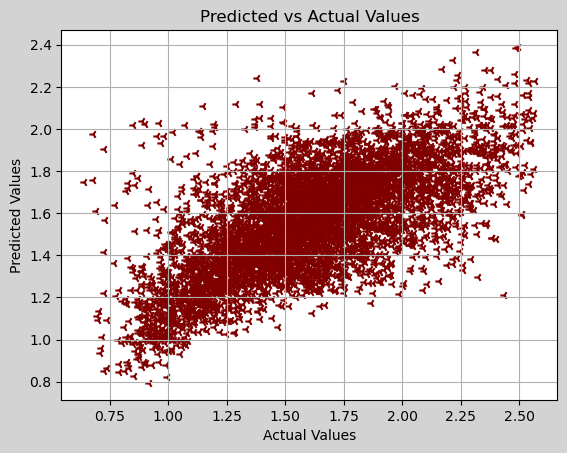

In [113]:
## plotting the results 

plt.figure(facecolor="lightgrey")
plt.scatter(y_test, rf_pred , marker="3", color = "maroon")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.grid(True)
plt.title("Predicted vs Actual Values")

In [114]:
## Random Forest Metrics 

print("Mean Absolute Error:", mean_absolute_error(rf_pred, y_test))
print("Mean Absolute Percentage Error:", mean_absolute_percentage_error(rf_pred, y_test))
print("Mean Poisson Deviance:", mean_poisson_deviance(rf_pred, y_test))
print("Mean Squared Error:", mean_squared_error(rf_pred, y_test))
print("R^2 Score:", r2_score(rf_pred, y_test))
print("Adjusted R^2 Score:", 1 - (1 - r2_score(rf_pred, y_test) * len( y_train - 1) / len(y_train) - X_train.shape[1] - 1))

Mean Absolute Error: 0.20444743443020025
Mean Absolute Percentage Error: 0.13113527973874725
Mean Poisson Deviance: 0.04545124473494935
Mean Squared Error: 0.07281370156260043
R^2 Score: -0.19145240473828729
Adjusted R^2 Score: 8.808547595261713


#### 3. SVM Regressor

In [115]:
## loading the regressor

from sklearn import svm

sr = svm.SVR()

In [116]:
## fitting the data

sr.fit(X_train, y_train)

SVR()

In [117]:
## predicting the average price

sr_pred = sr.predict(X_test)
sr_pred

array([1.35706292, 1.4250602 , 1.51832373, ..., 1.55145117, 1.72370543,
       1.47266524])

Text(0.5, 1.0, 'Predicted vs Actual Values')

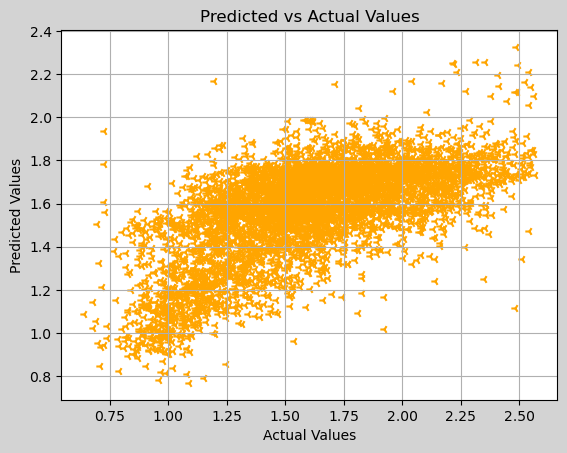

In [120]:
## plotting the results 

plt.figure(facecolor="lightgrey")
plt.scatter(y_test, sr_pred , marker="3", color = "orange")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.grid(True)
plt.title("Predicted vs Actual Values")

In [119]:
## SVM Regressor Metrics

print("Mean Absolute Error:", mean_absolute_error(sr_pred, y_test))
print("Mean Absolute Percentage Error:", mean_absolute_percentage_error(sr_pred, y_test))
print("Mean Poisson Deviance:", mean_poisson_deviance(sr_pred, y_test))
print("Mean Squared Error:", mean_squared_error(sr_pred, y_test))
print("R^2 Score:", r2_score(sr_pred, y_test))
print("Adjusted R^2 Score:", 1 - (1 - r2_score(sr_pred, y_test) * len( y_train - 1) / len(y_train) - X_train.shape[1] - 1))

Mean Absolute Error: 0.21510429540004963
Mean Absolute Percentage Error: 0.13638215663060843
Mean Poisson Deviance: 0.04720638413404381
Mean Squared Error: 0.0768793547103397
R^2 Score: -0.6872284333419745
Adjusted R^2 Score: 8.312771566658025


### Conclusion:

The Random Forest Regressor is the best predictor of the average price.

### Application:

These models can be used to predict price, economic development, research proposals, patient welfare in healthcare insitutions etc.